<a href="https://colab.research.google.com/github/kenltho2/scratch-work/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 2: Differentiation
Numerical Methods CPSMA 4413, Dr. Jacob \\
Kennedy Thomas (sole member of Group 11) \\
**I started this project by recycling the error functions I wrote in Project 1, as they still work the same. Next, I wrote a function for $e^x$.**

In [45]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def TrueError(true_value, approx_value):
    terror = true_value - approx_value
    return terror

def rTrueError(true_value,approx_value):
    rterror = (true_value - approx_value) / true_value
    return rterror

def ApproxError (current_approx, previous_approx):
    if previous_approx == '' :
      return 'None'
    else:
      aerror = current_approx - previous_approx
    return aerror 

def relativeApproxError(ApproxError, current_approx):
    if current_approx == 0:
      return 'None'
    else:
      raerror = ApproxError / current_approx
      return raerror

def f(x):
  return math.exp(x)

**I am ready to write my functions for approximating the derivative using the Forward Divided Difference (FDD) method, the Backward Divided Difference (BDD) method, and the Central Divided Difference (CDD) method.**

In [ ]:
def fdd(x,h):
  fdd_dx = (f(x + h) - f(x)) / h
  return fdd_dx

def bdd(x,h):
  bdd_dx = (f(x) - f(x - h)) / h
  return bdd_dx

def cdd(x,h):
  cdd_dx = (f(x + h) - f(x - h)) / (2 * h)
  return cdd_dx

def secondorder(x,h):
  sodx = (f(x + h) - 2 * f(x) + f(x - h)) / (h**2)
  return sodx 

  

**With the functions written, I can begin to organize the data. Below are several dataframes, each containing the approximations using each method and the true error and relative error of each approximation at 5 different values for h.**

In [64]:
#General Pandas dataframe that contains all of the approximations for the derivative and the actual value.

d = {'Step Size (h)': [0.1,0.05,0.025,0.0125,0.00625],
     'e^x':[f(2),f(2),f(2),f(2),f(2)],
     'FDD':[fdd(2,0.1),fdd(2,0.05),fdd(2,0.025),fdd(2,0.0125),fdd(2,0.00625)],
     'BDD':[bdd(2,0.1),bdd(2,0.05),bdd(2,0.025),bdd(2,0.0125),bdd(2,0.00625)],
     'CDD':[cdd(2,0.1),cdd(2,0.05),cdd(2,0.025),cdd(2,0.0125),cdd(2,0.00625)],
     'f"(x) approximation':[secondorder(2,0.1),secondorder(2,0.05),secondorder(2,0.025),secondorder(2,0.0125),secondorder(2,0.00625)]
     }

df = pd.DataFrame(data=d)
df

,Step Size (h),e^x,FDD,BDD,CDD,"f""(x) approximation"
0,0.10000,7.389056,7.771138,7.031617,7.401377,7.395216
1,0.05000,7.389056,7.576900,7.207370,7.392135,7.390596
2,0.02500,7.389056,7.482194,7.297458,7.389826,7.389441
3,0.01250,7.389056,7.435431,7.343066,7.389249,7.389152
4,0.00625,7.389056,7.412195,7.366013,7.389104,7.389080


In [65]:
#Pandas dataframe for the forward difference and the absolute and relative error.


r = {'FDD':[fdd(2,0.1),fdd(2,0.05),fdd(2,0.025),fdd(2,0.0125),fdd(2,0.00625)],
     'e^x':[f(2),f(2),f(2),f(2),f(2)],
     'True Error':[TrueError(f(2),fdd(2,0.1)),TrueError(f(2),fdd(2,0.05)),TrueError(f(2),fdd(2,0.025)),TrueError(f(2),fdd(2,0.0125)),TrueError(f(2),fdd(2,0.00625))],
     'Relative True Error': [rTrueError(f(2),fdd(2,0.1)),rTrueError(f(2),fdd(2,0.05)),rTrueError(f(2),fdd(2,0.025)),rTrueError(f(2),fdd(2,0.0125)),rTrueError(f(2),fdd(2,0.00625))]
     }

df_forward = pd.DataFrame(data=r)
df_forward

,FDD,e^x,True Error,Relative True Error
0,7.771138,7.389056,-0.382082,-0.051709
1,7.576900,7.389056,-0.187844,-0.025422
2,7.482194,7.389056,-0.093138,-0.012605
3,7.435431,7.389056,-0.046375,-0.006276
4,7.412195,7.389056,-0.023139,-0.003132


In [66]:
#Pandas dataframe for the backward difference and the absolute and relative error.


b = {'BDD':[bdd(2,0.1),bdd(2,0.05),bdd(2,0.025),bdd(2,0.0125),bdd(2,0.00625)],
     'e^x':[f(2),f(2),f(2),f(2),f(2)],
     'True Error':[TrueError(f(2),bdd(2,0.1)),TrueError(f(2),bdd(2,0.05)),TrueError(f(2),bdd(2,0.025)),TrueError(f(2),bdd(2,0.0125)),TrueError(f(2),bdd(2,0.00625))],
     'Relative True Error': [rTrueError(f(2),bdd(2,0.1)),rTrueError(f(2),bdd(2,0.05)),rTrueError(f(2),bdd(2,0.025)),rTrueError(f(2),bdd(2,0.0125)),rTrueError(f(2),bdd(2,0.00625))]
     }

df_backward = pd.DataFrame(data=b)
df_backward

,BDD,e^x,True Error,Relative True Error
0,7.031617,7.389056,0.357440,0.048374
1,7.207370,7.389056,0.181686,0.024588
2,7.297458,7.389056,0.091598,0.012396
3,7.343066,7.389056,0.045990,0.006224
4,7.366013,7.389056,0.023043,0.003118


In [67]:
#Pandas dataframe for the central difference and the absolute and relative error.


c = {'CDD':[cdd(2,0.1),cdd(2,0.05),cdd(2,0.025),cdd(2,0.0125),cdd(2,0.00625)],
     'e^x':[f(2),f(2),f(2),f(2),f(2)],
     'True Error':[TrueError(f(2),cdd(2,0.1)),TrueError(f(2),cdd(2,0.05)),TrueError(f(2),cdd(2,0.025)),TrueError(f(2),cdd(2,0.0125)),TrueError(f(2),cdd(2,0.00625))],
     'Relative True Error': [rTrueError(f(2),cdd(2,0.1)),rTrueError(f(2),cdd(2,0.05)),rTrueError(f(2),cdd(2,0.025)),rTrueError(f(2),cdd(2,0.0125)),rTrueError(f(2),cdd(2,0.00625))]
     }

df_central = pd.DataFrame(data=c)
df_central

,CDD,e^x,True Error,Relative True Error
0,7.401377,7.389056,-0.012321,-0.001668
1,7.392135,7.389056,-0.003079,-0.000417
2,7.389826,7.389056,-0.000770,-0.000104
3,7.389249,7.389056,-0.000192,-0.000026
4,7.389104,7.389056,-0.000048,-0.000007


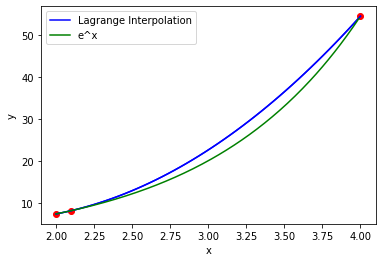

In [68]:
x_values = np.array([2,2.1,4])

y_values = np.array([f(2),f(2.1),f(4)])

xl = np.linspace(x_values[0],x_values[-1])

yl = np.array([])

for px in xl:
  py = 0
  for xi,yi in zip(x,y):
    py += yi * np.prod((px - x[x!=xi]) / (xi - x[x!=xi]))
  yl = np.append(yl,py)

x_true = np.arange(2,4,.01)
plt.plot(x_values,y_values,'ro',xl,yl,'b-')
plt.plot(xl,yl,'b-', label = 'Lagrange Interpolation')
plt.plot( x_true,np.exp(x_true),'g-', label = 'e^x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()